<a href="https://colab.research.google.com/github/st2-0-3-1-0-2-8-4/CMP7005_S2_PRAC1/blob/main/st20310284_cmp7005_s2_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **st20310284 CMP7005 PRAC1.ipynb**


### **Import the necessary Libraries:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Loading the Pandas dataframe:**

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/st2-0-3-1-0-2-8-4/CMP7005_S2_PRAC1/refs/heads/main/combined_output.csv"
df = pd.read_csv(url,index_col=0,parse_dates=[0])
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
df.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


In [ ]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

### **Exploratory Data Analysis**

In [ ]:
df.shape

(280512, 18)

In [ ]:
#shows columns in list format
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'Date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280512 entries, 1 to 35064
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   year     280512 non-null  int64         
 1   month    280512 non-null  int64         
 2   day      280512 non-null  int64         
 3   hour     280512 non-null  int64         
 4   PM2.5    273382 non-null  float64       
 5   PM10     275262 non-null  float64       
 6   SO2      272834 non-null  float64       
 7   NO2      271124 non-null  float64       
 8   CO       266718 non-null  float64       
 9   O3       270586 non-null  float64       
 10  TEMP     280162 non-null  float64       
 11  PRES     280164 non-null  float64       
 12  DEWP     280152 non-null  float64       
 13  RAIN     280158 non-null  float64       
 14  wd       278500 non-null  object        
 15  WSPM     280212 non-null  float64       
 16  station  280512 non-null  object        
 17  Date     280512 

### **Total Number of stations in the dataset**

In [ ]:
stations = df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 4


,count
station,
Shunyi,70128
Huairou,70128
Aotizhongxin,70128
Changping,70128


### **Look at the missing values**

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

             0         1
year         0  0.000000
month        0  0.000000
day          0  0.000000
hour         0  0.000000
PM2.5     7130  2.541781
PM10      5250  1.871578
SO2       7678  2.737138
NO2       9388  3.346737
CO       13794  4.917437
O3        9926  3.538530
TEMP       350  0.124772
PRES       348  0.124059
DEWP       360  0.128337
RAIN       354  0.126198
wd        2012  0.717260
WSPM       300  0.106947
station      0  0.000000
Date         0  0.000000


,Missing Values,% of Total Values
CO,13794,4.917437
O3,9926,3.538530
NO2,9388,3.346737
SO2,7678,2.737138
PM2.5,7130,2.541781
PM10,5250,1.871578
wd,2012,0.717260
DEWP,360,0.128337
RAIN,354,0.126198
TEMP,350,0.124772


## **Creating New DataFrame for Air Quality Index**

In [ ]:
selected_columns = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'wd', 'DEWP', 'PRES', 'TEMP', 'RAIN', 'WSPM', 'year', 'day', 'month', 'hour', 'Date', 'station']

# Create a new DataFrame with only the selected columns
df1 = df[selected_columns]

# Display the first few rows of the new DataFrame
df1.head()


,CO,O3,NO2,SO2,PM2.5,PM10,wd,DEWP,PRES,TEMP,RAIN,WSPM,year,day,month,hour,Date,station
No,,,,,,,,,,,,,,,,,,
1,300.0,44.0,8.0,3.0,3.0,6.0,NW,-20.5,1025.8,-0.9,0.0,9.3,2013,1,3,0,2013-03-01,Shunyi
2,300.0,47.0,7.0,3.0,12.0,12.0,NW,-21.3,1026.1,-1.1,0.0,9.4,2013,1,3,1,2013-03-01,Shunyi
3,200.0,22.0,7.0,NaN,14.0,14.0,NW,-23.0,1026.2,-1.7,0.0,8.6,2013,1,3,2,2013-03-01,Shunyi
4,NaN,NaN,5.0,3.0,12.0,12.0,NW,-23.3,1027.3,-2.1,0.0,6.6,2013,1,3,3,2013-03-01,Shunyi
5,200.0,11.0,NaN,3.0,12.0,12.0,NW,-22.9,1027.7,-2.4,0.0,4.5,2013,1,3,4,2013-03-01,Shunyi


In [ ]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
CO,13794,4.917437
O3,9926,3.538530
NO2,9388,3.346737
SO2,7678,2.737138
PM2.5,7130,2.541781
PM10,5250,1.871578
wd,2012,0.717260
DEWP,360,0.128337
RAIN,354,0.126198
TEMP,350,0.124772


## **Imputing missing values**

### **Mean/Median/Mode Imputation**
* **Mean:** Replace missing values with the mean of the column.

* **Median**: Replace missing values with the median of the column. This is useful if your data has outliers, as the median is less sensitive to them.

* **Mode:** Replace missing values with the mode (most frequent value) of the column. This is often used for categorical variables but can be applied to numerical data as well.

In [ ]:
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
dff= df1.groupby(['year','month','station', 'Date'])[pollutants].mean().reset_index()
dff

,year,month,station,Date,CO,O3,NO2,SO2,PM2.5,PM10
0,2013,3,Aotizhongxin,2013-03-01,429.166667,63.875000,22.583333,11.708333,7.125000,10.750000
1,2013,3,Aotizhongxin,2013-03-02,824.916667,29.750000,66.666667,36.625000,30.750000,42.083333
2,2013,3,Aotizhongxin,2013-03-03,1620.625000,19.125000,81.000000,61.291667,76.916667,120.541667
3,2013,3,Aotizhongxin,2013-03-04,617.391304,53.750000,46.956522,22.869565,22.708333,44.583333
4,2013,3,Aotizhongxin,2013-03-05,2357.958333,68.458333,132.833333,93.875000,148.875000,183.791667
...,...,...,...,...,...,...,...,...,...,...
5839,2017,2,Shunyi,2017-02-24,883.333333,47.416667,41.916667,9.208333,24.791667,31.375000
5840,2017,2,Shunyi,2017-02-25,587.500000,51.458333,41.833333,8.416667,16.458333,25.375000
5841,2017,2,Shunyi,2017-02-26,675.000000,49.625000,46.708333,12.541667,28.083333,41.750000
5842,2017,2,Shunyi,2017-02-27,1487.500000,24.208333,83.916667,20.375000,73.333333,88.750000


In [ ]:
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['TEMP']=df1['TEMP'].fillna((df1['TEMP'].median()))
df1['PRES']=df1['PRES'].fillna((df1['PRES'].median()))
df1['DEWP']=df1['DEWP'].fillna((df1['DEWP'].median()))
df1['RAIN']=df1['RAIN'].fillna((df1['RAIN'].median()))
df1['wd']=df1['wd'].fillna((df1['wd'].mode()))
df1['WSPM']=df1['WSPM'].fillna((df1['WSPM'].median()))


In [ ]:
df1

,CO,O3,NO2,SO2,PM2.5,PM10,wd,DEWP,PRES,TEMP,RAIN,WSPM,year,day,month,hour,Date,station
No,,,,,,,,,,,,,,,,,,
1,300.0,44.0,8.0,3.0,3.0,6.0,NW,-20.5,1025.8,-0.9,0.0,9.3,2013,1,3,0,2013-03-01,Shunyi
2,300.0,47.0,7.0,3.0,12.0,12.0,NW,-21.3,1026.1,-1.1,0.0,9.4,2013,1,3,1,2013-03-01,Shunyi
3,200.0,22.0,7.0,6.0,14.0,14.0,NW,-23.0,1026.2,-1.7,0.0,8.6,2013,1,3,2,2013-03-01,Shunyi
4,800.0,46.0,5.0,3.0,12.0,12.0,NW,-23.3,1027.3,-2.1,0.0,6.6,2013,1,3,3,2013-03-01,Shunyi
5,200.0,11.0,37.0,3.0,12.0,12.0,NW,-22.9,1027.7,-2.4,0.0,4.5,2013,1,3,4,2013-03-01,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,300.0,46.0,14.0,4.0,28.0,47.0,NNE,-13.3,1008.9,11.7,0.0,1.3,2017,28,2,19,2017-02-28,Changping
35061,500.0,64.0,23.0,3.0,12.0,12.0,N,-14.0,1009.0,10.9,0.0,2.1,2017,28,2,20,2017-02-28,Changping
35062,500.0,68.0,17.0,5.0,7.0,23.0,N,-13.0,1009.4,9.5,0.0,1.5,2017,28,2,21,2017-02-28,Changping


In [ ]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
wd,2012,0.717260
CO,0,0.000000
O3,0,0.000000
NO2,0,0.000000
PM2.5,0,0.000000
SO2,0,0.000000
PM10,0,0.000000
DEWP,0,0.000000
PRES,0,0.000000
TEMP,0,0.000000


In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
CO,280512.0,1138.266655,100.0,500.0,800.0,1400.0,10000.0,1079.562384
O3,280512.0,56.940402,0.2142,14.0,46.0,79.0,444.0,54.510065
NO2,280512.0,44.762039,1.0265,20.0,37.0,62.0,290.0,32.180355
SO2,280512.0,14.27841,0.2856,2.0,6.0,17.0,341.0,20.477805
PM2.5,280512.0,75.115333,2.0,19.0,51.0,104.0,941.0,76.199205
PM10,280512.0,98.308102,2.0,33.0,76.0,137.0,999.0,87.414465
DEWP,280512.0,2.333966,-43.4,-9.2,2.9,15.0,29.1,13.826266
PRES,280512.0,1010.066883,982.4,1001.7,1009.7,1018.1,1042.8,10.486019
TEMP,280512.0,13.277368,-19.9,3.0,14.3,23.0,41.4,11.503972
RAIN,280512.0,0.064125,0.0,0.0,0.0,0.0,72.5,0.820489


# **Key Insights from the Summary Statistics:**

**Date Range & Trends**
The dataset spans from March 1, 2013, to Febraury 28, 2017.
The median date (~December 31, 2014) suggests that most data points are centered around 2015-2017.

**PM2.5 & PM10 Levels (Air Pollution Indicators)**

**PM2.5 Mean:** 78.95 µg/m³ (with a max of 941.00 µg/m³ which indicates an extreme pollution event). Levels above 35 µg/m³ are considered unhealthy and precautions should be taken like wearing a face mask.

**PM10 Mean:** 104.82 µg/m³ (with a max of 999.00 that is considered hazardous for human health).

High standard deviation (79.69 for PM2.5 and 91.87 for PM10) suggest high air quality variations.

**Other Pollutants**

**CO (Carbon Monoxide):** Mean 1199.05 is considered potentially dangerous and can harm susceptible individuals (with a max of 10,000 which is considered hazardous).

**O3 (Ozone):** Mean 57.28 is considered moderate, max 450.00 that is considered very high and is dangerous to all and a health warning should be considered.

**Nitric Oxide (NO2):** Mean 50.00 is considered generally safe but prolonged exposure can affect vulnerable people, max 290.00 is considered concerning for human health.

**SO2 (Sulfur Dioxide):** Mean 14.61is considered good air quality, max 500 represents a significant concern.

**Final Thoughts:**

The data suggests severe air pollution events, with occasional hazardous levels.
High variability across pollutants implies that air quality is affected by multiple factors (seasonal changes, industrial activity, and vehicular emissions).

Further EDA with time-series analysis can help identify pollution trends and their causes.

### **Subsetting columns**
Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called pollutants containg the major pollutants responsible for air pollution.

In [ ]:
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']

In [ ]:
df1.columns

Index(['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'wd', 'DEWP', 'PRES', 'TEMP',
       'RAIN', 'WSPM', 'year', 'day', 'month', 'hour', 'Date', 'station'],
      dtype='object')

### **Visualisation of each pollutants (using daily data)**

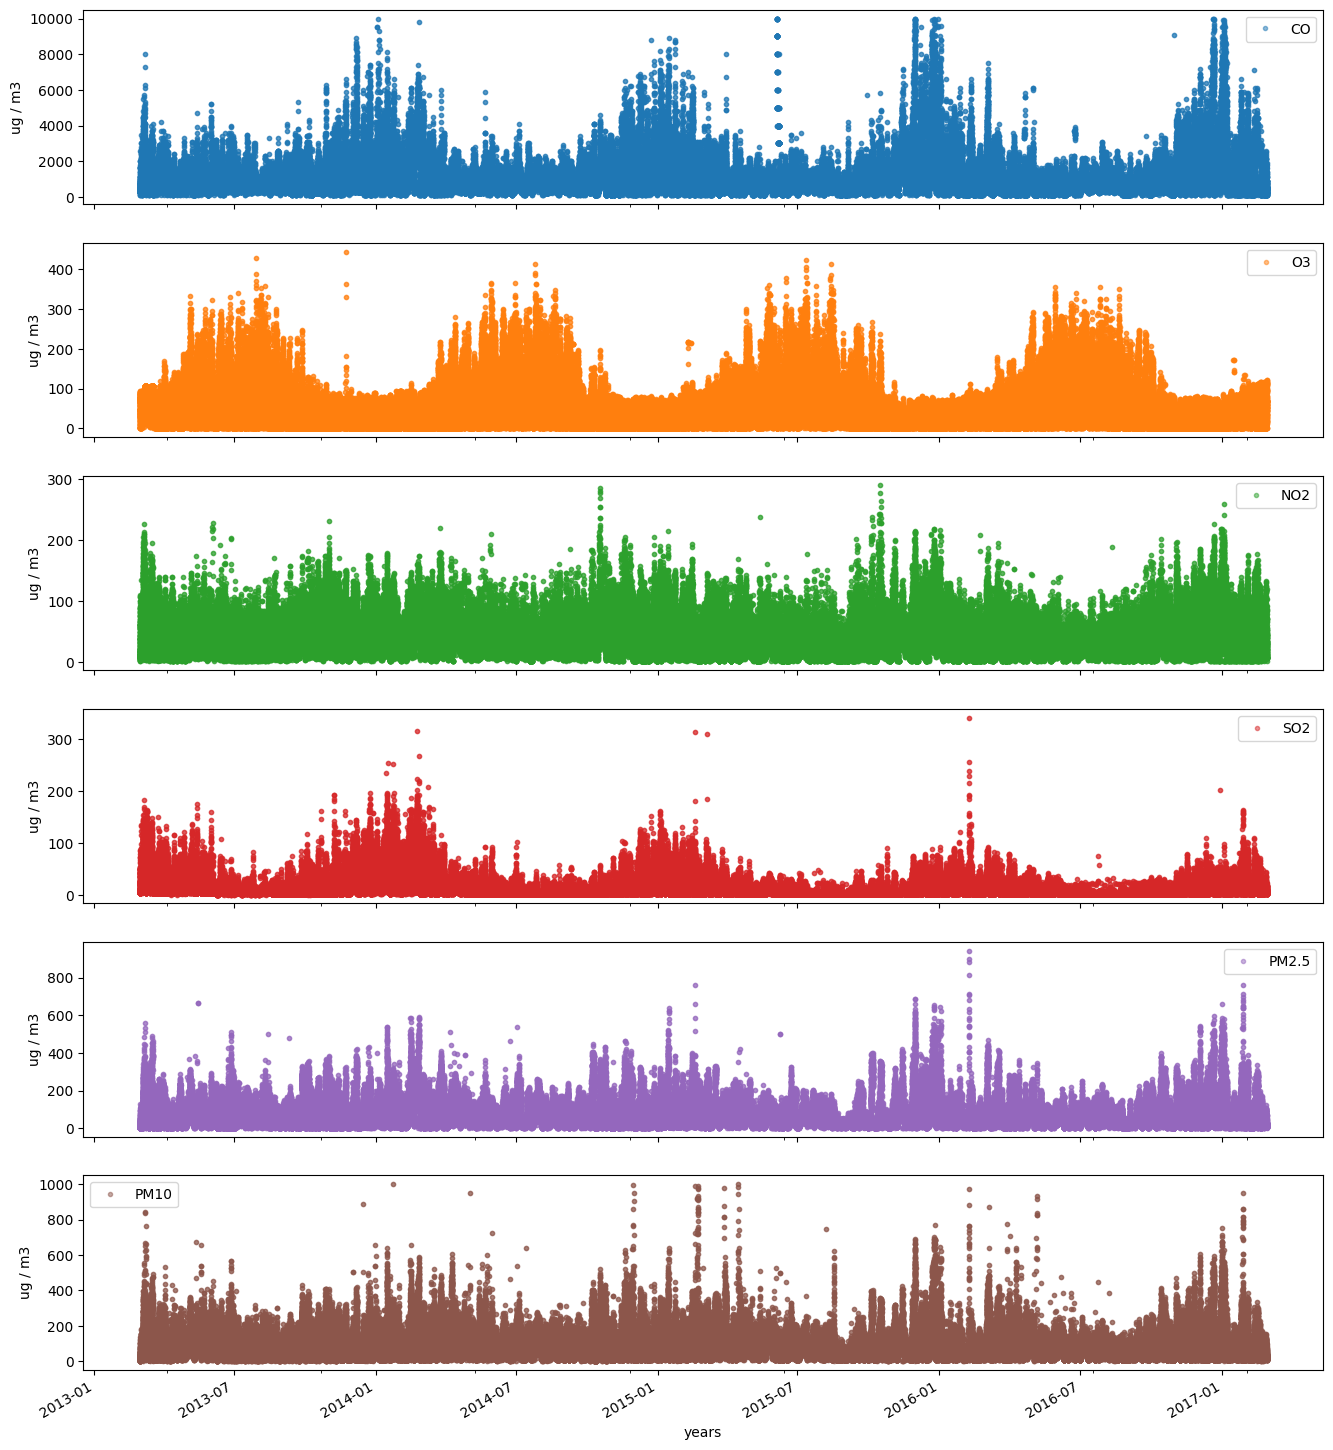

In [ ]:
df1.set_index('Date',inplace=True)
axes = df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('years')
    ax.set_ylabel('ug / m3')

### **Monthwise Plot**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
#df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year and month, and calculating mean for each pollutant
df1['Month'] = df1['Date'].dt.to_period('M')
df_monthly = df1.groupby('Month')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),  # Convert PeriodIndex to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df1 and pollutants are already defined
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df1.groupby(['year', 'month'])[pollutants].mean().reset_index()

# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(DAY=1))

# Create subplots for each pollutant
fig = make_subplots(rows=len(pollutants), cols=1, subplot_titles=[f'{pollutant} Monthly Average Concentration Over Time' for pollutant in pollutants])

# Add traces for each pollutant
for i, pollutant in enumerate(pollutants):
    fig.add_trace(
        go.Scatter(
            x=monthly_avg['Date'],
            y=monthly_avg[pollutant],
            mode='lines+markers',
            name=pollutant,
            line=dict(color='blue', width=2),
            marker=dict(size=8),
            opacity=0.7
        ),
        row=i+1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Monthly Average Concentrations of Pollutants Over Time',
    title_font_size=24,
    showlegend=False,
    height=300 * len(pollutants),  # Adjust height based on the number of pollutants
    width=1000
)

# Update y-axis labels
for i, pollutant in enumerate(pollutants):
    fig.update_yaxes(title_text=f'{pollutant} (ug/m3)', row=i+1, col=1)

# Update x-axis labels
fig.update_xaxes(title_text='Date', row=len(pollutants), col=1)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
monthly_avg

,year,month,CO,O3,NO2,SO2,PM2.5,PM10,Date
0,2013,3,1329.270497,55.615051,60.754650,36.000811,102.590726,125.970766,2013-03-01
1,2013,4,873.238889,61.709880,41.199394,19.465993,59.277431,94.063889,2013-04-01
2,2013,5,911.907258,85.884814,44.958855,23.445690,78.467070,125.679099,2013-05-01
3,2013,6,1167.743056,73.829639,41.707914,11.094243,92.557986,114.824306,2013-06-01
4,2013,7,846.395161,79.734834,33.523392,6.988255,65.129368,76.757392,2013-07-01
5,2013,8,811.525538,77.866458,32.856907,5.664652,58.559140,74.317204,2013-08-01
6,2013,9,1042.910764,48.121365,41.393949,9.290302,73.471181,92.290625,2013-09-01
7,2013,10,1002.956989,29.404285,55.783271,13.893131,84.609543,106.401882,2013-10-01
8,2013,11,1180.868056,30.930389,51.819091,21.567365,65.904861,87.610417,2013-11-01
9,2013,12,1576.915323,25.084846,51.804002,37.383627,67.004704,83.797379,2013-12-01


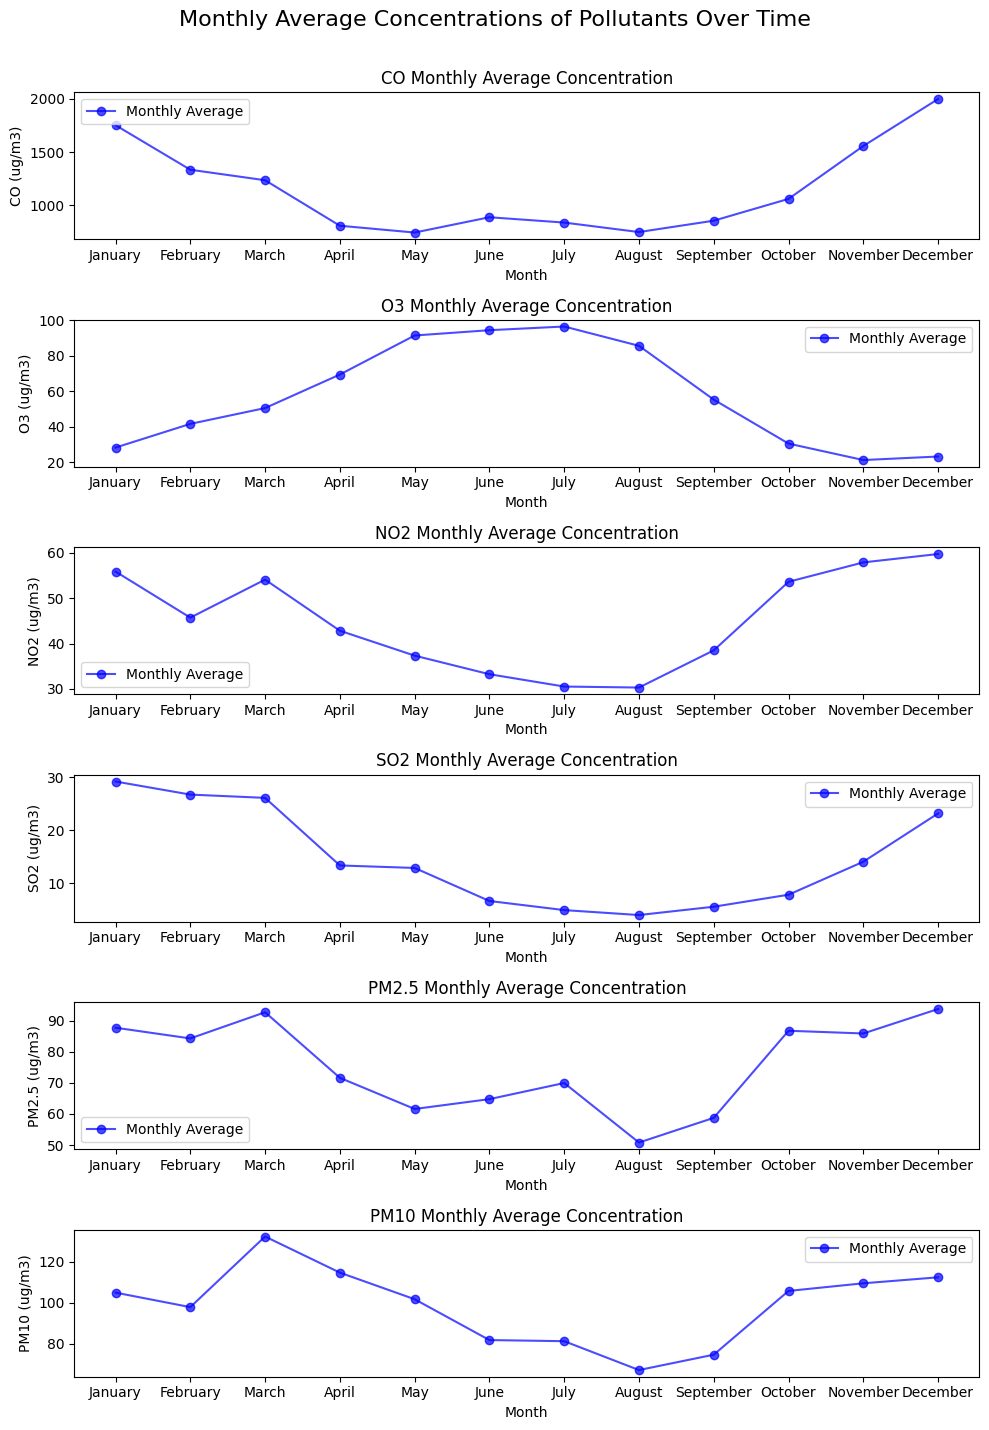

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is in datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year, and calculating mean for each pollutant
df1['Year'] = df1['Date'].dt.year
df_yearly = df1.groupby('Year')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Yearly Pollutant Levels"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_yearly.index.astype(str),  # Convert Year to string for x-axis
            y=df_yearly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Yearly Pollutant Levels",
    xaxis_title="Year",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


## **Most Dominant Pollutants:**

In [ ]:
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
pol=df1[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,CO,1138.266655
1,O3,56.940402
2,NO2,44.762039
3,SO2,14.278410
4,PM2.5,75.115333
5,PM10,98.308102


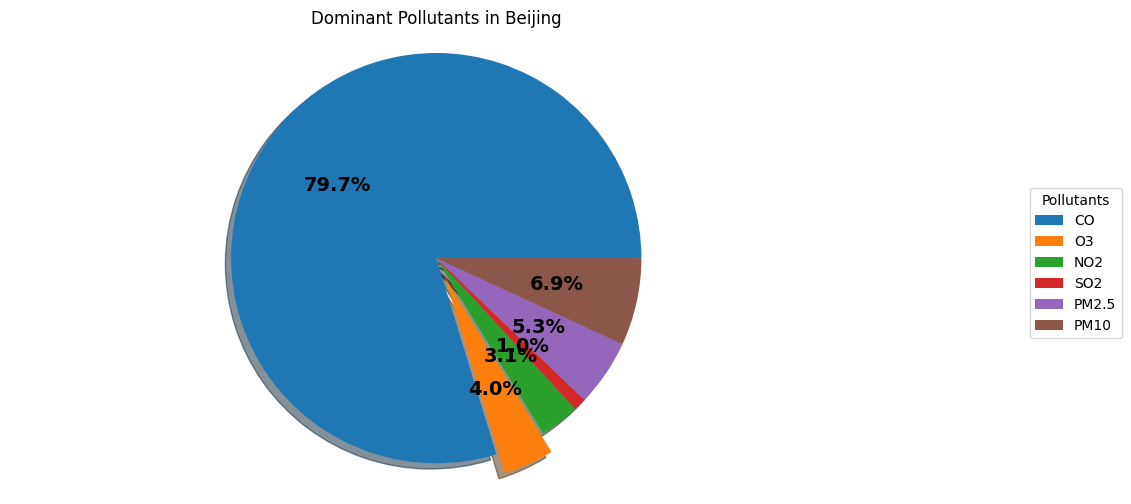

In [ ]:
plt.figure(figsize=(11,6))

labels = pollutants_df['Pollutant']
explode = [0, 0.1, 0, 0, 0, 0]  # Exploding the first slice (CO)

plt.title('Dominant Pollutants in Beijing')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

## **Dominant Pollutant stationwise**

In [ ]:
import pandas as pd

pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']

# Group data by 'State' and calculate the mean of each pollutant
statewise_pollution_means = df1.groupby('station')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_state = statewise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_state.reset_index()
dominant_pollutant_df.columns = ['Station', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df


,Station,Dominant Pollutant
0,Aotizhongxin,CO
1,Changping,CO
2,Huairou,CO
3,Shunyi,CO


## **Correlation between the different Pollutants**

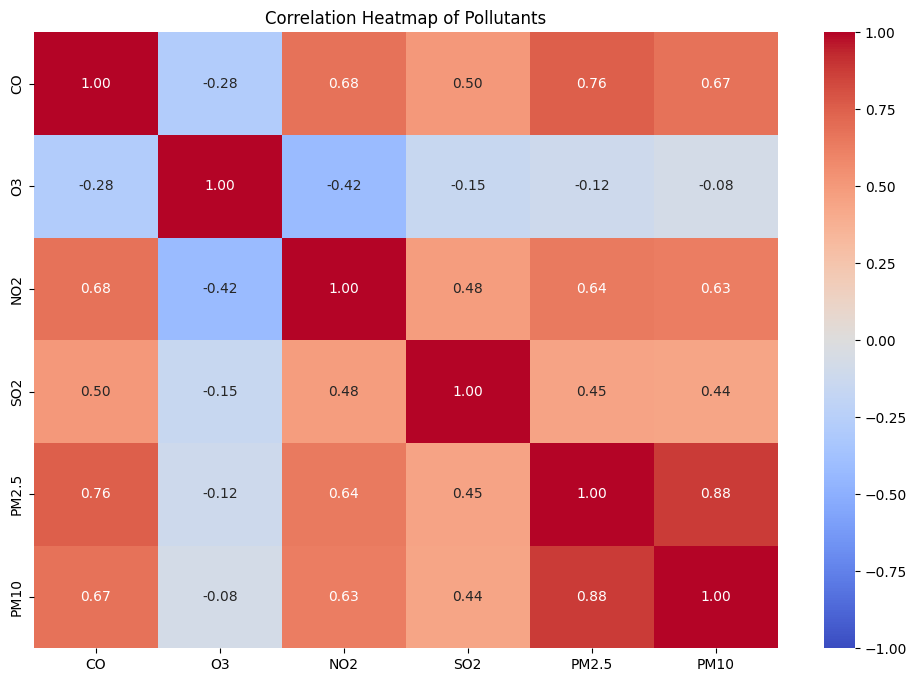

In [ ]:

# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


### **The above shows a correlation between CO and all other Pollutants**

In [ ]:
numeric_pollutants_df.corr()

,CO,O3,NO2,SO2,PM2.5,PM10
CO,1.000000,-0.283358,0.676558,0.502093,0.756965,0.674013
O3,-0.283358,1.000000,-0.422341,-0.150085,-0.116907,-0.076995
NO2,0.676558,-0.422341,1.000000,0.484333,0.643236,0.630437
SO2,0.502093,-0.150085,0.484333,1.000000,0.451881,0.441897
PM2.5,0.756965,-0.116907,0.643236,0.451881,1.000000,0.877078
PM10,0.674013,-0.076995,0.630437,0.441897,0.877078,1.000000


## **Correlation between the different Pollutants and Weather Conditions**

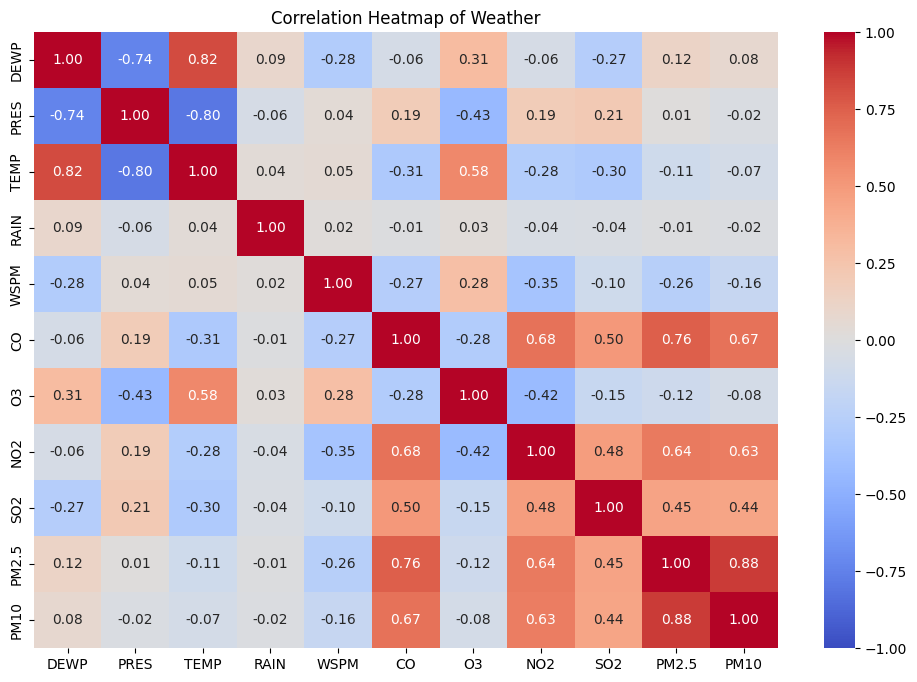

In [ ]:

# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the weather columns
weather_and_pollutants = ['DEWP','PRES','TEMP', 'RAIN', 'WSPM', 'CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
numeric_weather_df = df1[weather_and_pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_weather_df = numeric_weather_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_weather_df = numeric_weather_df

# Calculate the correlation matrix
correlation_matrix = numeric_weather_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Weather')
plt.show()


### **The above shows a correlation between O3 and Temperature**

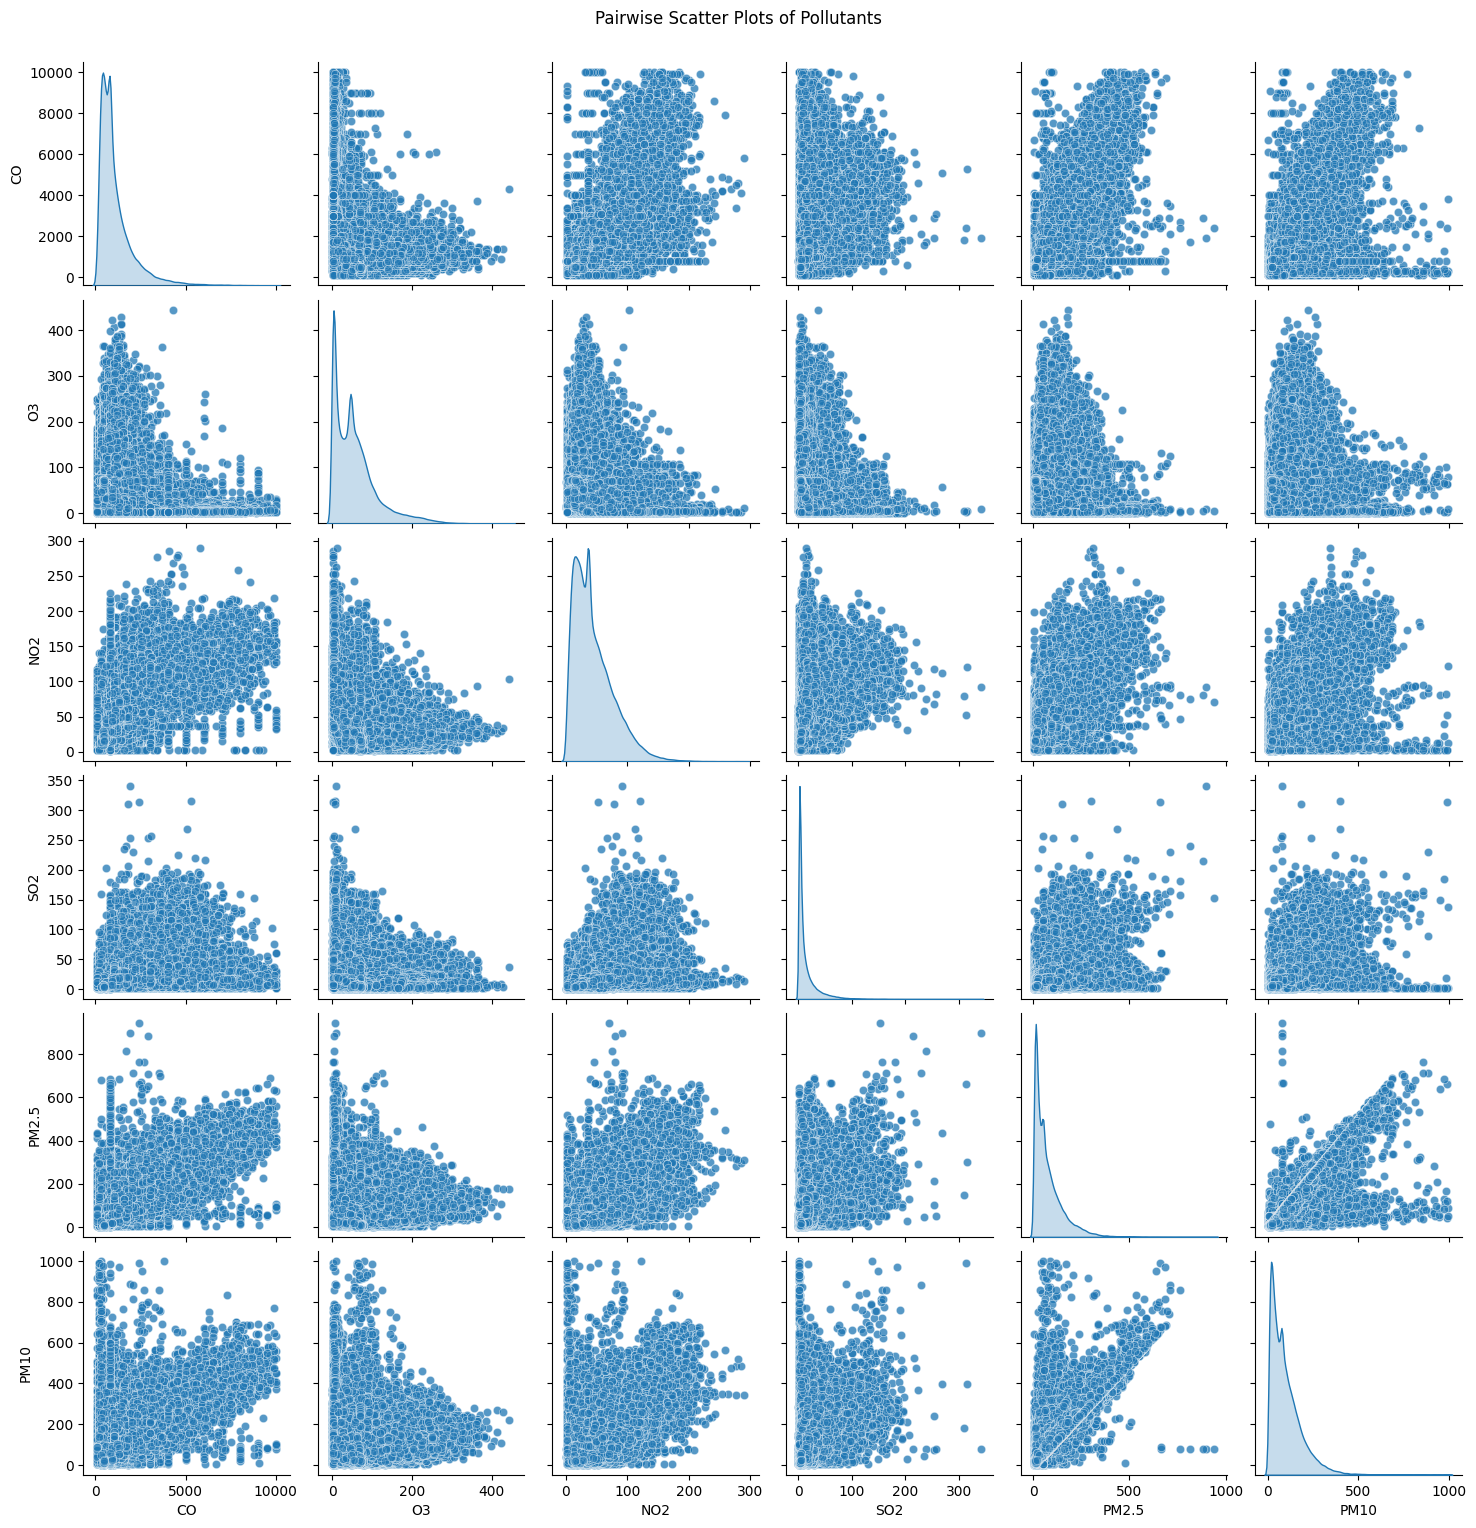

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()


## **Top 2 polluted Stations (based on Pollutants)**

Let's now look at the Beijing stations which contribute to maximum pollution. We shall output the top 2 stations in each pollutant category by mean concentration of the pollutant over the years.

In [ ]:
def max_polluted_station(pollutants):
    x1 = df[[pollutants,'station']].groupby(["station"]).mean().sort_values(by=pollutants,ascending=False).reset_index()
    x1[pollutants] = round(x1[pollutants],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Example usage with your top pollutant DataFrames
co = max_polluted_station('CO')
o3 = max_polluted_station('O3')
no2 = max_polluted_station('NO2')
so2 = max_polluted_station('SO2')
pm2_5 = max_polluted_station('PM2.5')
pm10 = max_polluted_station('PM10')

# Display the DataFrames side by side
display_side_by_side(co, o3, no2, so2, pm2_5, pm10)


,station,CO
0,Aotizhongxin,1262.950000
1,Shunyi,1187.060000
2,Changping,1152.300000
3,Huairou,1022.550000
,station,O3
0,Huairou,59.820000
1,Changping,57.940000
2,Aotizhongxin,56.350000
3,Shunyi,55.200000
,station,NO2


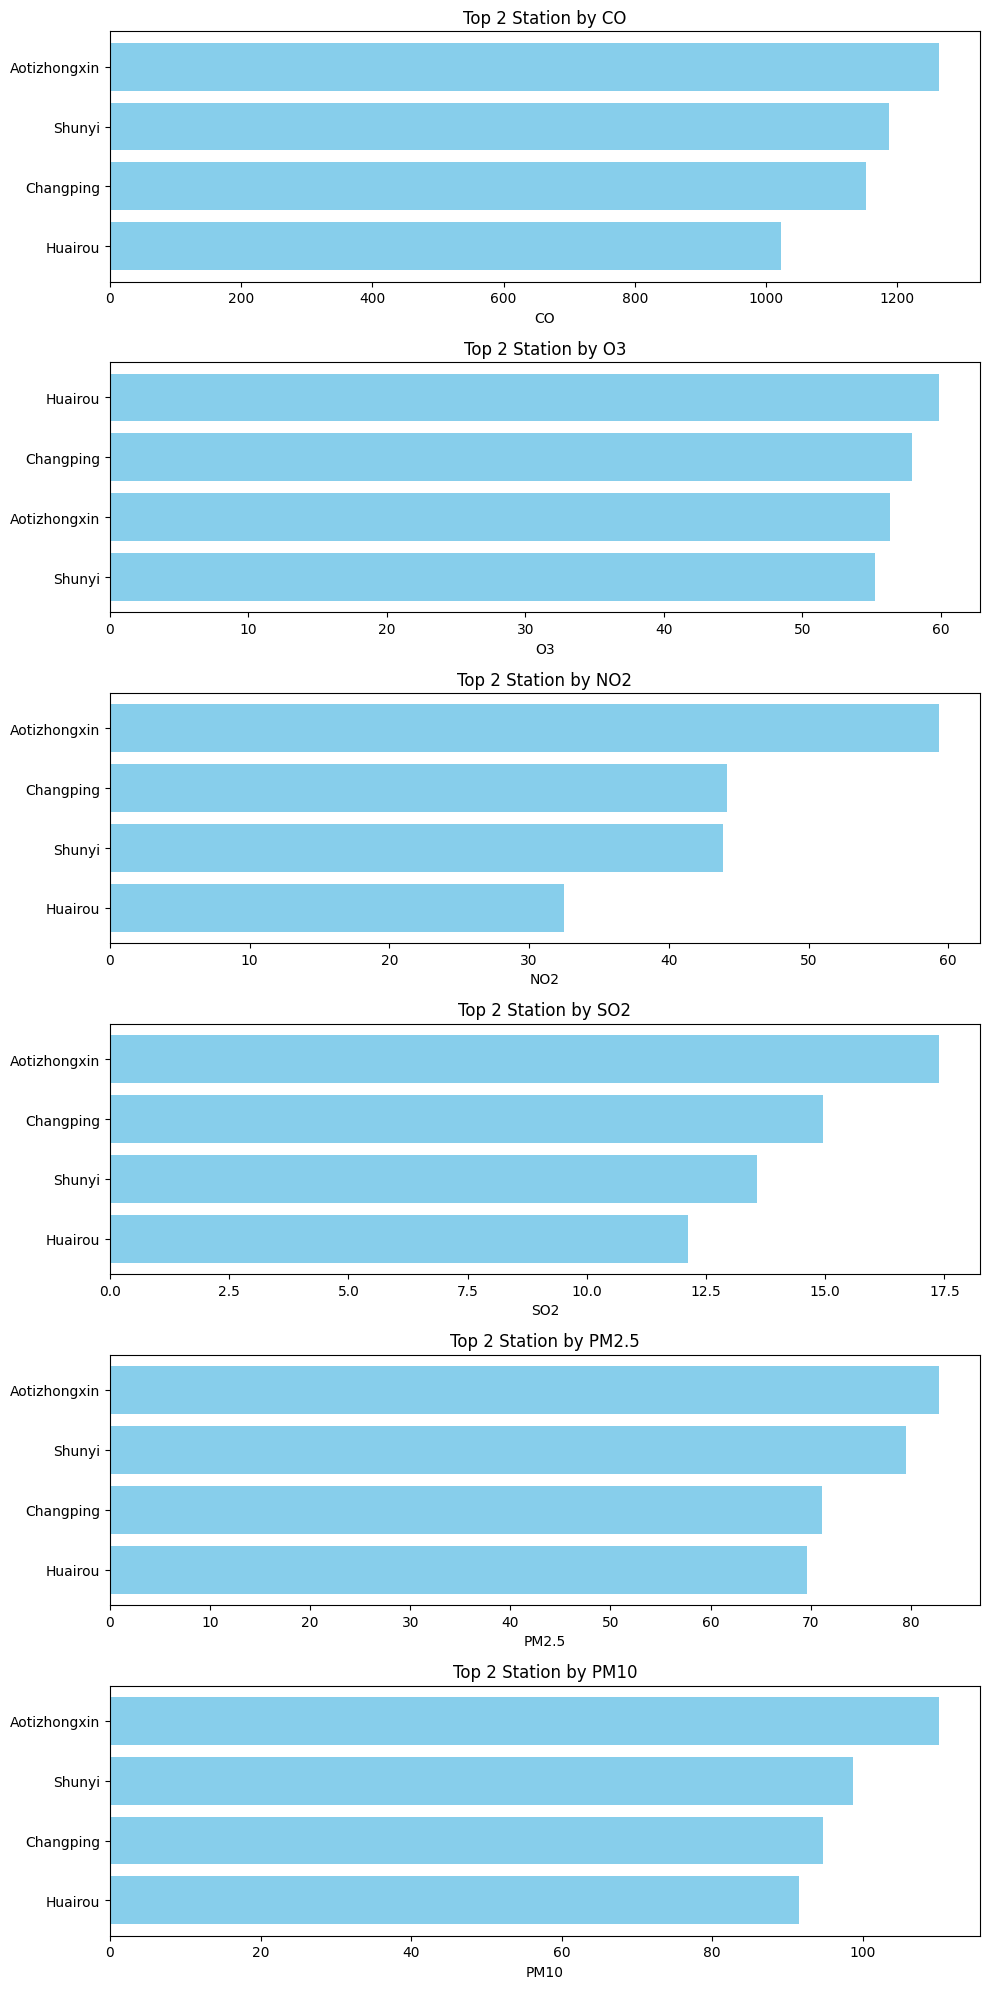

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with pollutant data
pollutant_columns = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']
# Step 1: Group by station and calculate mean pollutant concentrations
mean_pollutant_by_station = df.groupby('station')[pollutant_columns].mean()

# Step 2: Find the top 2 stations for each pollutant
top_stations = {}
for pollutant in pollutant_columns:
    top_stations[pollutant] = mean_pollutant_by_station[pollutant].sort_values(ascending=False).head(10)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_stations[pollutant].index, top_stations[pollutant].values, color='skyblue')
    axes[i].set_title(f'Top 2 Station by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


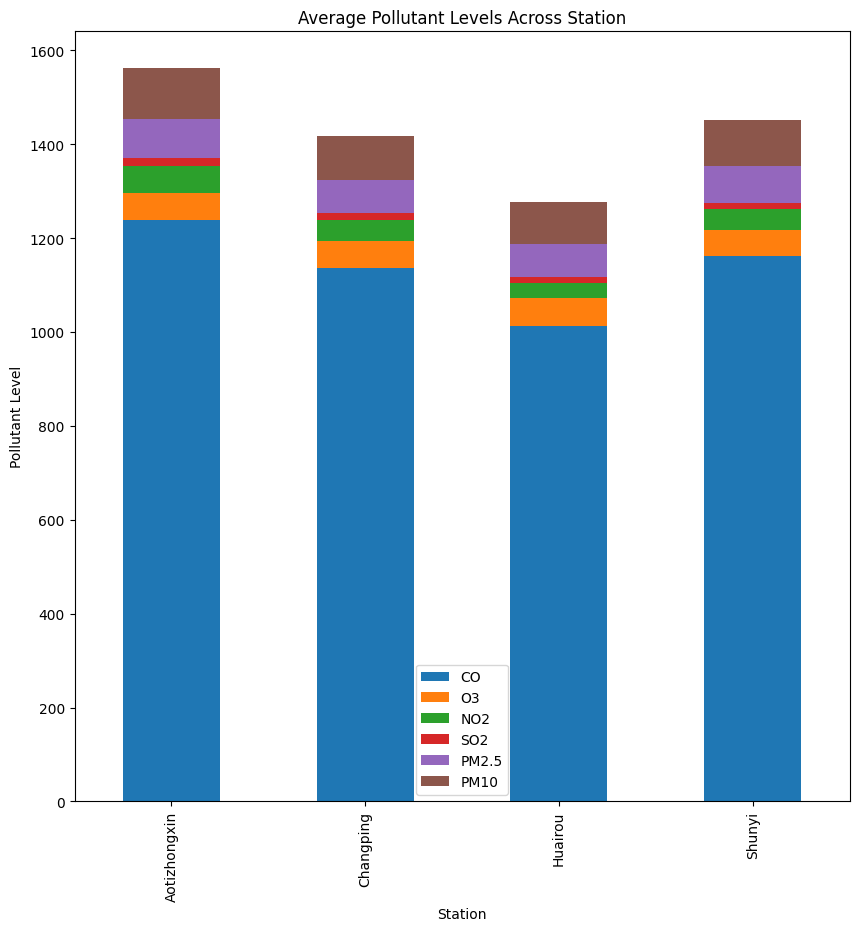

In [ ]:
# Define the pollutant columns
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10']

# Calculate the average levels of pollutants for each station
station_pollution = df1.groupby('station')[pollutants].mean()

import matplotlib.pyplot as plt

# Plotting the average pollutants for each station
station_pollution.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('Average Pollutant Levels Across Station')
plt.xlabel('Station')
plt.ylabel('Pollutant Level')
plt.show()
